<a href="https://colab.research.google.com/github/saranshhhh/Quora_Predictions/blob/main/Quora_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

kaggle.json  sample_data


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
# it sets an environment variable "KAGGLE_CONFIG_DIR" to the current directory which is denoted by '.'
# kaggle uses a configuration file called "kaggle.json" to access kaggle api. by setting "KAGGLE_CONFIG_DIR" to the current dir.
# we are indicating kaggle configuration files to get stored in the same directory as python script.

In [3]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data

# hnere we are downloading the data, instead of downloading the whole data we're downloading particular files using
# "-f train.csv -p data", etc. these commands are given in the documentation i.e. "-f,-p"

 87% 48.0M/54.9M [00:00<00:00, 119MB/s]
100% 54.9M/54.9M [00:00<00:00, 113MB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 48.5MB/s]
 32% 5.00M/15.8M [00:00<00:00, 32.6MB/s]
100% 15.8M/15.8M [00:00<00:00, 76.0MB/s]


In [4]:
train_fname = '/content/data/train.csv.zip'
test_fname = '/content/data/test.csv.zip'
sample_fname = '/content/data/sample_submission.csv.zip'

In [5]:
import pandas as pd

In [6]:
raw_df = pd.read_csv(train_fname)

In [7]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [8]:
sincere_df = raw_df[raw_df.target==0]

In [9]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [10]:
insincere_df = raw_df[raw_df.target==1]

In [11]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [12]:
raw_df.target.value_counts(normalize = True)
# This gives us an insight about how many labels are 0 and 1, we have normalized the values thus it gives us relative value
# this tells us if our model simply predicts every label as '0', then also our model will have ~94% accuracy. Hence, we need to
# focus on f1 score.

0    0.93813
1    0.06187
Name: target, dtype: float64

<Axes: >

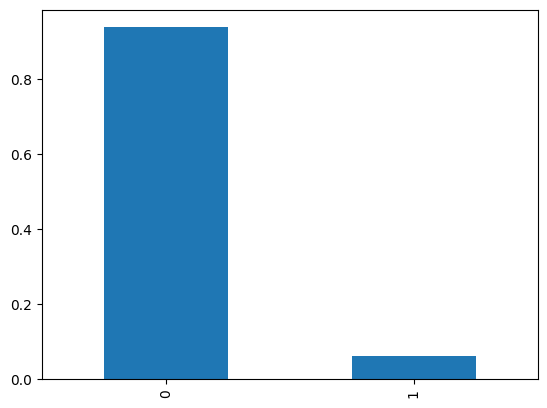

In [13]:
raw_df.target.value_counts(normalize = True).plot(kind='bar')

In [14]:
test_df = pd.read_csv(test_fname)
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [15]:
sub_df = pd.read_csv(sample_fname)
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [16]:
sub_df.prediction.value_counts()

0    375806
Name: prediction, dtype: int64



```
So what we have to do is that, read the question from the test_df and generate a label against the same q_id in the sub_df
```



In [17]:
# instead of using all 1.3 million rows, we are takin a sample of 100K rows and training our model using

In [18]:
SAMPLE_SIZE = 100_000

In [19]:
sample_df = raw_df.sample(SAMPLE_SIZE, random_state = 42)
# random_state ensures that everytime we run the code, same samples gets loaded for training

In [20]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [21]:
sample_df.target.value_counts(normalize=True)

0    0.93962
1    0.06038
Name: target, dtype: float64



```
Preparing the data for training
```



In [22]:
# Now we'll convert our questions into TF-Idf Vectors. For this first we need tokenizer which will convert the questions into words of vocab.
# we also need a stemmer and stopwords.
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# For this we'll use word_tokenize from nltk library.
# punkt: It is a pre-trained unsupervised ML model, used to tokenize sentences.
# word_tokenize is dependent on punkt. "While "word_tokenize" primarily focuses on breaking text into words, it also handles some basic
# sentence segmentation implicitly. It uses the Punkt tokenizer's capabilities to handle punctuation and sentence-ending markers
# while tokenizing text into words." (sentence-ending markers: words that indicates end of sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer(language = 'english')
# we're using snowballstemmer, what stemmer does is that it converts words which can be in many forms and converts them into thier root form.
# We need speed and simplicity, thus we are using snowballstemmer, if we need more accuracy then we could use lemmatization

In [24]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text)]
# Here we've created a function which will tokeinze and the stem the words.

tokenize("this is a sample text for checking the above function")

['this', 'is', 'a', 'sampl', 'text', 'for', 'check', 'the', 'abov', 'function']

In [25]:
eng_stopwords = stopwords.words('english')
", ".join(eng_stopwords)
# Stopwords are the words which occurs too frequently in a documents, they have very less or no use contribution towards the context
# of the doc. this removing them is a good choice because 1. Removing them won't affect the context/meaning of the document
# 2. removing them will help in dimentionality reduction

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [26]:
# All the above are used as parameters in vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vectorizer = TfidfVectorizer(lowercase = True, tokenizer = tokenize, stop_words = eng_stopwords, max_features = 1000)
# max_features: it represents max no. of words/terms in which the document will get represented as vector. in our case its 1000.
# they are used to reduce the dimensionality of the data
# features includes the most frequent terms in the text data,

In [28]:
%%time
vectorizer.fit(sample_df.question_text)
# Fit: is about learning from the data to calculate parameters. It prepares the transformers to transform the data

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 28.5 s, sys: 95.8 ms, total: 28.6 s
Wall time: 31.7 s


TfidfVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f6ad7057640>)

In [29]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [30]:
inputs = vectorizer.transform(sample_df.question_text)
# transform: applies the learnt parameters to convert data into new representation

In [31]:
inputs.shape
# This shows we have 1 lakh questions represented as vectors of size 1000

(100000, 1000)

In [32]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)
# We've converted the test data into vectors using the same features we've learned otherwise it won't make sense

CPU times: user 1min 38s, sys: 262 ms, total: 1min 38s
Wall time: 1min 40s


In [33]:
test_inputs.shape

(375806, 1000)



```
Splitting the data into training and validation set
```



In [34]:
from sklearn.model_selection import train_test_split

In [35]:
targets = sample_df.target

In [36]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size = 0.3)

In [37]:
train_inputs.shape

(70000, 1000)



```
Now we'll convert them into pytorch tensors
```



In [38]:
import torch

In [39]:
# train and val inputs are sparse array thus we need to us .toarray for conversion else it will show error
# By converting sparse data to dense arrays first, it ensures compatibility with the
# existing APIs, libraries, and operations provided by the deep learning frameworks.

train_input_tensors = torch.tensor(train_inputs.toarray()).float()
val_input_tensors = torch.tensor(val_inputs.toarray()).float()

# we have converted them to tensors, tensors are similar to numpy arrays. the only difference is that we can backpropagate using tensors
# On differentiating thet will give us the gradient

In [40]:
train_target_tensors = torch.tensor(train_targets)
val_target_tensors = torch.tensor(val_targets)

ValueError: ignored

In [41]:
type(train_targets)

pandas.core.series.Series

In [42]:
type(train_targets.values)

numpy.ndarray

In [43]:
# the input should be of type dense arrays for converting them to tensor. thus we are using .values
train_target_tensors = torch.tensor(train_targets.values).float()
val_target_tensors = torch.tensor(val_targets.values).float()

In [44]:
test_input_tensors = torch.tensor(test_inputs.toarray()).float()

# Whenever we are converting something from numpy or pandas, convert them into floats

In [45]:
from torch.utils.data import TensorDataset, DataLoader

In [46]:
train_ds = TensorDataset(train_input_tensors, train_target_tensors)
val_ds = TensorDataset(val_input_tensors, val_target_tensors)
test_ds = TensorDataset(test_input_tensors)

# Instead of training the whole data as once we're passing the data in batches because
# 1. If we train the whole data all at once there is a change that model might run out of ram
# 2. passing data in batches helps in model convergence fast. we are creating a batch size of 128

# for dividing the data into batches first we have to create the torch database, which we have done above

In [47]:
bs = 128
train_dl = DataLoader(train_ds, batch_size = bs, shuffle = True)
val_dl = DataLoader(val_ds, batch_size = bs)
test_dl = DataLoader(train_ds, batch_size=bs)
# For the train_dl, we 've set shuffle to true so that for every epoch different data will go under training.
# Shuffle helps in generalizing the training process as model will see different data in every epoch

In [48]:
for inputs_batch, targets_batch in train_dl:
    print('inputs.shape', inputs_batch.shape)
    print('targets.shape', targets_batch.shape)
    print(targets_batch)
    break

# This is how our batch looks like, we have used break so that we can see the first batch only, else for loop will keep running until
# it gives all the batches info.

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])


In [49]:
len(train_dl)
# 547*128 = 70016, the last batch has litte less than 128 questions because of the limit we decided.

547

In [50]:
547*128

70016



```
How does our model works?
We are using Logistic regression and FFNN for training.

Let's consider "What is the meaning of life?" as a question present in our dataset. in the model it will be represented as a TF-IDF vector
of size 1000 which we have created above. Now how will our model gets trained is first each of the column will get multiplied with their
weights then after adding all those multiplied weights we'll pass this term to sigmoid function which will convert it within the range (0-1)
                                           ----------------
x1*w1 + x2*w2 + ...... x1000*w1000 = X --> | Y = 1/1+e^-X |
                                           ----------------
This Y is the predicted probability of our LR Model. In our model 0 represents sincere and 1 represents in-sincere question. This question
looks like a sincere question thus will have a target label of 0. Let's say the Y for this question is 0.3, but the target label is 0. So now
we'll calculate the loss function. With LR we use Cross-Entropy as loss function. In C.E we multiply the predicted prob. with the actual label
we repeat the same for every question in the batch, add them all then take the average of them. This term is called as Loss Function.

Our aim is to reduce this loss function with the help of optimizers.

This was just 1 model. what if we have multiple LR models which will do the exact same thing for the dataset?
Then, We'll have better accuracy, better generalization.

How?
For instance if we train a single LR model then, we'll have 1000 parameters on which our model gets trained. so here we'll be figuring
the relationship b/w input and output using 1000 parameters which if we see is little restrictive!

Now lets consider a FFNN Model, in its hidden layer if we have 100 nodes, each node is a LR model and every node requires 1000 parameters
100X1000 = 100K parameters and we can increase them as we introduce more hidden layers. In FFNN each node can learn some different aspect
of the model and most importantly our model can learn non-linear relationships, giving us better performance.

```





```
Implementing the Model
```



In [51]:
import torch.nn as nn
import torch.nn.functional as F
# nn: it provides a high level API for defining and training neural network arcitecture, it contains activation fn., loss fn., optimizers, etc
# nn.functional: It contains functions which performs operation typically used within NN

In [69]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1000, 1)

    def forward(self, xb):
        out = self.linear1(xb)
        return out

In [70]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

In [71]:
logreg_model = LogReg()

In [73]:
for batch in val_dl:
    batch_inputs, batch_targets = batch
    print('inputs.shape', batch_inputs.shape)
    print('targets', batch_targets)

    batch_out = logreg_model(batch_inputs)
    probs = torch.sigmoid(batch_out[:,0])
    preds = (probs >= 0.5).int()

    print('outputs', preds)
    print('accuracy', accuracy_score(batch_targets, preds))
    print('f1_score', f1_score(batch_targets, preds))
    break

inputs.shape torch.Size([128, 1000])
targets tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0.])
outputs tensor([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 

In [74]:
# Evaluating the Model performance
def evaluate_trial(model, dl):
  for batch in dl:
    losses, accs, f1s = [], [], []
    inputs, targets = batch
    outputs = model(inputs)

    # Converting outputs to probabilities
    probs = torch.sigmoid(outputs[:,0])

    # Calculating Loss
    loss = F.binary_cross_entropy(preds.float(), targets)

    # Converting probs to prediction
    Preds = (probs > 0.5).int()

    # Checking metrics
    acc = accuracy_score(targets, Preds)
    f1 = f1_score(targets, Preds)

    losses.append(loss)
    accs.append(acc)
    f1s.append(f1)

    return torch.mean(torch.tensor(losses)).item(), torch.mean(torch.tensor(accs)).item(), torch.mean(torch.tensor(f1s)).item()

# Loss is used for training the model. It should be continous and differentiable
# Whereas accuracy, f1 score are just for Human interpretation

In [80]:
# Training the model batch by batch
def fit_trial(epochs, lr, model, train_dl, val_dl):
  history = []
  optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay = 1e-5) # Weight decay is used to avoid overfitting

  for epoch in range(epochs):
    for batch in train_dl:
      inputs, targets = batch
      outputs = model(inputs)

      # Converting outputs to probabilities
      probs = torch.sigmoid(outputs[:,0])

      # Calculating Loss
      loss = F.binary_cross_entropy(probs.float(), targets.float())

      # performing optimization
      loss.backward()
  # We're backpropagating using gradient descent. How it works is it first compites the derivative of the loss wrt each individual weights
      optimizer.step()
  # Then we use those derivates of those weights to slightly adjust those weights
      optimizer.zero_grad()
  # After adjusting those weights, we'll set the gradients back to 0
    # Evaluate phase
    loss, acc, f1 = evaluate_trial(model, val_dl)
    print("Epoch {}; Loss {:.4f}; Accuracy {:.4f}; F1 Score {:.4f}".format(
        epoch+1, loss, acc,f1 ))
    history.append([loss, acc, f1])
  return history

In [81]:
logreg_model = LogReg()

In [82]:
history = [evaluate_trial(logreg_model, val_dl)]

In [83]:
history

[(46.875, 0.59375, 0.037037037037037035)]

In [84]:
history += fit_trial(5, 0.01, logreg_model, train_dl, val_dl)

# for ep1, ep4 models accuracy is 92 but f1 score is 0. this suggests that your model might be performing well in terms of predicting the
# majority class accurately but is struggling with the minority class. This occurs due to class imbalance and because of this the model's
# loss might the same for epochs while f1 and accuracy changes.
# so Now we'll recreate the fit funtion where we'll give more weights to insincere questions.

Epoch 1; Loss 46.8750; Accuracy 0.9453; F1 Score 0.0000
Epoch 2; Loss 46.8750; Accuracy 0.9531; F1 Score 0.2500
Epoch 3; Loss 46.8750; Accuracy 0.9375; F1 Score 0.2000
Epoch 4; Loss 46.8750; Accuracy 0.9375; F1 Score 0.2000
Epoch 5; Loss 46.8750; Accuracy 0.9375; F1 Score 0.2000


In [85]:
def evaluate(model, dl):
    losses, accs, f1s = [], [], []
    for batch in dl:
        inputs, targets = batch
        out = model(inputs)

        probs = torch.sigmoid(out[:,0])
        loss = F.binary_cross_entropy(probs, targets.float(), weight=torch.tensor(20.))
        losses.append(loss.item())

        preds = (probs > 0.5).int()
        acc = accuracy_score(targets, preds)
        f1 = f1_score(targets, preds)

        accs.append(acc)
        f1s.append(f1)

    return np.mean(losses), np.mean(accs), np.mean(f1s)

In [86]:
def fit(epochs, lr, model, train_loader, val_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            inputs, targets = batch
            out = model(inputs)
            probs = torch.sigmoid(out[:,0])
            loss = F.binary_cross_entropy(probs,
                                          targets.float(),
                                          weight=torch.tensor(20.))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        loss, acc, f1 = result
        print('Epoch: {}; Loss: {:.4f}; Accuracy: {:.4f}; F1 Score: {:.4f}'.format(
            epoch, loss, acc, f1))
        history.append(result)

    return history

In [87]:
logreg_model = LogReg()

In [88]:
history = []

In [89]:
history = [evaluate(logreg_model, val_dl)]

In [90]:
history

[(13.835170210168716, 0.5527593085106383, 0.10786966823726274)]

In [91]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 3.4624; Accuracy: 0.9426; F1 Score: 0.0757
Epoch: 1; Loss: 3.1467; Accuracy: 0.9455; F1 Score: 0.2288
Epoch: 2; Loss: 3.0695; Accuracy: 0.9457; F1 Score: 0.3109
Epoch: 3; Loss: 3.0297; Accuracy: 0.9463; F1 Score: 0.3160
Epoch: 4; Loss: 3.0177; Accuracy: 0.9465; F1 Score: 0.3442


In [93]:
history += fit(5, 0.015, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 3.0186; Accuracy: 0.9468; F1 Score: 0.3670
Epoch: 1; Loss: 3.0051; Accuracy: 0.9471; F1 Score: 0.3590
Epoch: 2; Loss: 2.9990; Accuracy: 0.9470; F1 Score: 0.3771
Epoch: 3; Loss: 2.9900; Accuracy: 0.9477; F1 Score: 0.3624
Epoch: 4; Loss: 2.9854; Accuracy: 0.9473; F1 Score: 0.3814


In [94]:
history += fit(5, 0.001, logreg_model, train_dl, val_dl)

Epoch: 0; Loss: 2.9857; Accuracy: 0.9472; F1 Score: 0.3795
Epoch: 1; Loss: 2.9855; Accuracy: 0.9474; F1 Score: 0.3806
Epoch: 2; Loss: 2.9849; Accuracy: 0.9473; F1 Score: 0.3793
Epoch: 3; Loss: 2.9850; Accuracy: 0.9474; F1 Score: 0.3818
Epoch: 4; Loss: 2.9848; Accuracy: 0.9476; F1 Score: 0.3849


In [95]:
losses = [item[0] for item in history]

In [96]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loss')

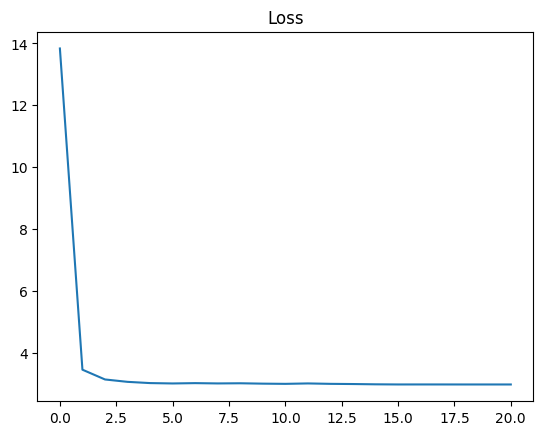

In [97]:
plt.plot(losses);
plt.title('Loss')

In [98]:
f1s = [item[2] for item in history]

Text(0.5, 1.0, 'F1 Score')

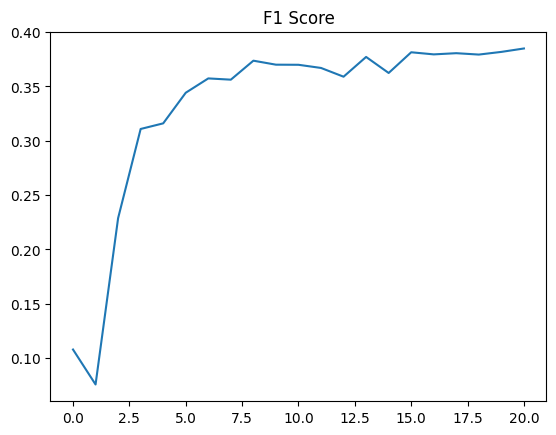

In [99]:
plt.plot(f1s)
plt.title('F1 Score')

In [124]:
# Defining our FFNN model
class QuoraNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1000,512)
    self.layer2 = nn.Linear(512,256)
    self.layer3 = nn.Linear(256,128)
    self.layer4 = nn.Linear(128,1)
    pass

  def forward(self, inputs):
    out = self.layer1(inputs)
    out = F.relu(out)
    out = self.layer2(out)
    out = F.relu(out)
    out = self.layer3(out)
    out = F.relu(out)
    out = self.layer4(out) # we don't apply activation fn. to the last layer because when we'll calc. loss we'll use activation anyways
    return out

# when creating custom NN model, within __init__() we define the architecture for it using the available layer classes.
# super().__init__(): since we are inheriting nn.Module class we want out custom class to exhibits the same behaviours
# in addition to what we defined in this class. for this we use this constructor

In [125]:
model = QuoraNet()

In [126]:
for inputs_batch, targets_batch in train_dl:
    print('inputs.shape', inputs_batch.shape)
    print('targets.shape', targets_batch.shape)

    batch_out = model(inputs_batch)
    print('batch_out shape',batch_out.shape)

    # Converting outputs to probabilities
    probs = torch.sigmoid(batch_out[:,0])
    print('probs:',probs[:10])


    # Converting probs to prediction
    preds = (probs > 0.5).int()
    print('preds', preds[:10])
    print('Targets: ',targets_batch[:10])

    # Checking metrics
    print('Accuracy:', accuracy_score(targets_batch, preds))
    print('F1 Score:', f1_score(targets_batch, preds))

    # Calculating Loss
    print("Loss: ", F.binary_cross_entropy(preds.float(), targets_batch))

    break
# This shows that our model has 5% accuracy, 0.1 as f1 score and a loss of 89.5. This is because we haven't trained our model yet
# this is just a demontration how our model works. Now we'll imporve this model by improving the loss function
# Currently we've a loss of 89.5, now we'll try to get this score as low as possible
# Here we're just passing one batch to the model. we have 547 batches
# binary_cross_entropy: when a model has to predict between two classes in that case we use this as our loss function

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
batch_out shape torch.Size([128, 1])
probs: tensor([0.4932, 0.4938, 0.4934, 0.4935, 0.4940, 0.4937, 0.4939, 0.4942, 0.4938,
        0.4941], grad_fn=<SliceBackward0>)
preds tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
Targets:  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Accuracy: 0.9296875
F1 Score: 0.0
Loss:  tensor(7.0312)


In [127]:
print(batch_out[:10])
print(targets_batch[:10])

tensor([[-0.0270],
        [-0.0250],
        [-0.0263],
        [-0.0259],
        [-0.0240],
        [-0.0253],
        [-0.0245],
        [-0.0231],
        [-0.0249],
        [-0.0238]], grad_fn=<SliceBackward0>)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [128]:
print("Training data: ",evaluate_trial(model, train_dl))
print("Validation data: ",evaluate_trial(model, val_dl))

Training data:  (4.6875, 0.953125, 0.0)
Validation data:  (4.6875, 0.953125, 0.0)


In [129]:
model = QuoraNet()

In [130]:
history = []

In [131]:
history.append(evaluate(model,val_dl))

In [132]:
history

[(14.251406929340769, 0.058200354609929075, 0.1092732593647304)]

In [134]:
%%time
history+=fit(5,0.005,model,train_dl,val_dl)

Epoch: 0; Loss: 3.2046; Accuracy: 0.9452; F1 Score: 0.4224
Epoch: 1; Loss: 3.8466; Accuracy: 0.9421; F1 Score: 0.3885
Epoch: 2; Loss: 6.0742; Accuracy: 0.9384; F1 Score: 0.3950
Epoch: 3; Loss: 7.3674; Accuracy: 0.9379; F1 Score: 0.3819
Epoch: 4; Loss: 9.2078; Accuracy: 0.9391; F1 Score: 0.3959
CPU times: user 1min 16s, sys: 115 ms, total: 1min 16s
Wall time: 1min 17s


In [137]:
test_tensors = torch.tensor(test_inputs.toarray()).float()

In [138]:
test_ds = TensorDataset(test_tensors)

In [140]:
test_dl = DataLoader(test_ds, bs)

In [135]:
def predict(model, dl):
    all_preds = []
    for batch in dl:
        inputs, = batch
        out = model(inputs)
        probs = torch.sigmoid(out)[:,0]
        preds = (probs > 0.5).int()
        all_preds += list(preds.numpy())
    return all_preds

In [141]:
test_preds = predict(model, test_dl)

In [142]:
test_preds[:20]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [144]:
sub_df.prediction = test_preds

In [145]:
sub_df.to_csv('submission.csv', index=None)

In [146]:
!head submission.csv

qid,prediction
0000163e3ea7c7a74cd7,0
00002bd4fb5d505b9161,0
00007756b4a147d2b0b3,1
000086e4b7e1c7146103,0
0000c4c3fbe8785a3090,0
000101884c19f3515c1a,0
00010f62537781f44a47,0
00012afbd27452239059,0
00014894849d00ba98a9,0
